In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
DatabaseDF = pd.read_csv("../CleanedDataset.csv")

DatabaseDF.head()

Unnamed: 0    Operator Well Name Formation  Lateral Length  Stages  \
0           0  Operator 1    Well 1       MBH          5114.0    30.0   
1           1  Operator 2    Well 2       MBH          5181.0     NaN   
2           2  Operator 2    Well 3       MBH          4780.0    15.0   
3           3  Operator 1    Well 4       MBH         10654.0     1.0   
4           4  Operator 2    Well 5       MBH          5209.0     1.0   

   Township   Range  Section  Total Prop, lbs  ...  Fluid Type from DI  \
0        141     99       10              0.0  ...                 NaN   
1        142     99       16         418000.0  ...                 NaN   
2        142     99       24         568407.0  ...                 NaN   
3        142     99        1         845000.0  ...                 NaN   
4        142     99       35         297366.0  ...                 NaN   

  SPACING_CAPPED  12 month Cum Prod  Completion Type  Sleeves  P&P  \
0          660.0              33.55              NaN      NaN  NaN   
1          660.0              27.62              NaN      NaN  NaN   
2          660.0              11.19               OH      NaN  NaN   
3          660.0              27.85              NaN      NaN  NaN   
4          660.0              50.88               OH      NaN  NaN   

   Frac Ports Repeater Ports  CT  Year Drilled  
0         NaN            NaN NaN        2006.0  
1         NaN            NaN NaN        2005.0  
2         NaN            NaN NaN        2006.0  
3         NaN            NaN NaN        2007.0  
4         NaN            NaN NaN        2006.0  

[5 rows x 30 columns]

## Definition

Voroni Diagrams are useful for determining information about an area given only a finite ammount of data points in that area, I will firstly create a function that does what I want and then will use it to explore interesting results from our data

## Voronoi Function

In [9]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [7]:
DatabaseDF[['Longitude','Latitude']]

Longitude   Latitude
0     -103.214580  47.051150
1     -103.225059  47.111368
2     -103.160910  47.097032
3     -103.178391  47.140248
4     -103.181300  47.080872
...           ...        ...
10851 -102.966717  48.238381
10852 -103.463599  48.198630
10853 -103.463476  48.198630
10854 -103.443193  48.081220
10855 -103.597930  48.343497

[10856 rows x 2 columns]

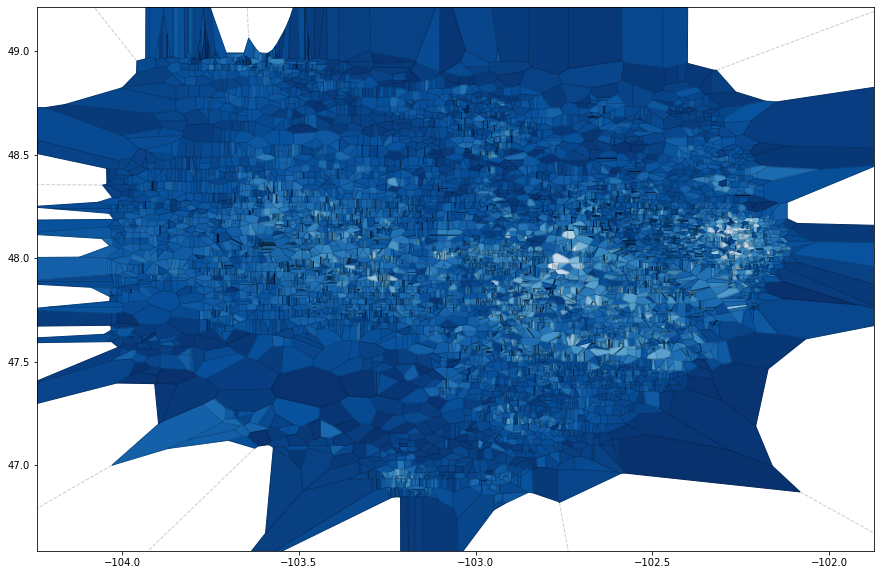

In [17]:
# generate data/speed values
points = DatabaseDF[['Longitude','Latitude']]
speed = DatabaseDF['12 month Cum Prod']

# generate Voronoi tessellation
vor = Voronoi(points)

# find min/max values for normalization
minima = min(speed)
maxima = max(speed)

# normalize chosen colormap
norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues_r)

# plot Voronoi diagram, and fill finite regions with color mapped from speed value
fig = voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1, line_width = 1, line_alpha = .2)

fig.set_size_inches((15,10))

for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r]))

plt.show()